In [1]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

from numpy.linalg import svd, pinv
from scipy.linalg import eig

In [2]:
Lx, Ly, Lz = 9,9,1
Nx, Ny, Nz = 288, 288, 32

Ra_D = -1.24e5
Prandtl = 0.7
N_s2 = 2

D_0 = 0
D_H = 1
M_0 = 0
M_H = -1

dealias = 3/2
stop_sim_time = 700
timestepper = d3.RK222
max_timestep = 0.125
dtype = np.float64

nu = (Ra_D / (Prandtl*(D_0-D_H)*Lz**3))**(-1/2)

In [3]:
folder_dir = "analysis"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['analysis/analysis_s1.h5', 'analysis/analysis_s2.h5', 'analysis/analysis_s3.h5', 'analysis/analysis_s4.h5']


In [4]:
def get_all_data(task, Nz):
    recorded = False
    for file in file_paths:
        with h5py.File(file, mode='r') as file:
            st = file['scales/sim_time']
            simtime = np.array(st)
            avg_0 = file["tasks"][task]
            avg = np.reshape(avg_0, (len(simtime),Nz))
            for t in range(len(simtime)):
                avg_T=np.transpose(avg[t,:])
                avg_T = np.reshape(avg_T, (1, Nz))
                if recorded == False:
                    avg_all_time = avg_T
                    recorded = True
                else:
                    avg_all_time = np.concatenate((avg_all_time, avg_T))
    print(np.shape(avg_all_time))
    print(np.shape(np.transpose(avg_all_time[:,:])))
    avg_allt_T=np.transpose(avg_all_time[:,:])
    return avg_allt_T
def draw_contour(avg_allt_T, task):
    plt.contourf(avg_allt_T, cmap='Spectral_r')
    plt.colorbar(label=f'{task}')
    plt.xlabel('time')
    plt.ylabel('z')
    plt.title(f'{task} vs time')
    #plt.savefig(f'{task.replace(" ", "_")}.png', dpi=200,bbox_inches='tight')
    plt.show()
    matplotlib.pyplot.close()

(4000, 32)
(32, 4000)
(4000, 32)
(32, 4000)
(4000, 32)
(32, 4000)
(64, 4000)


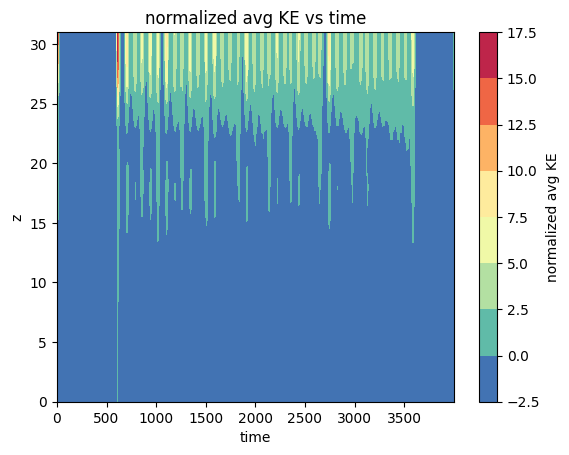

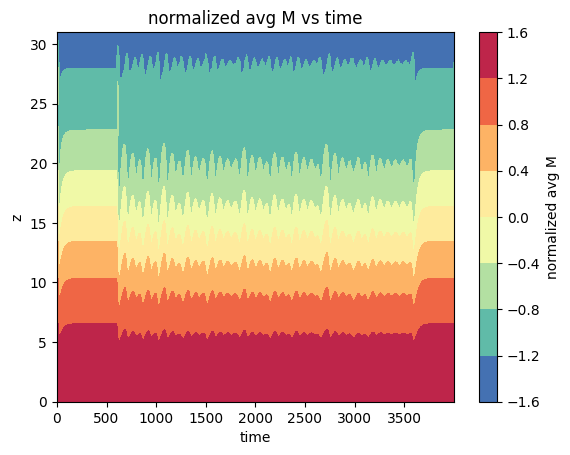

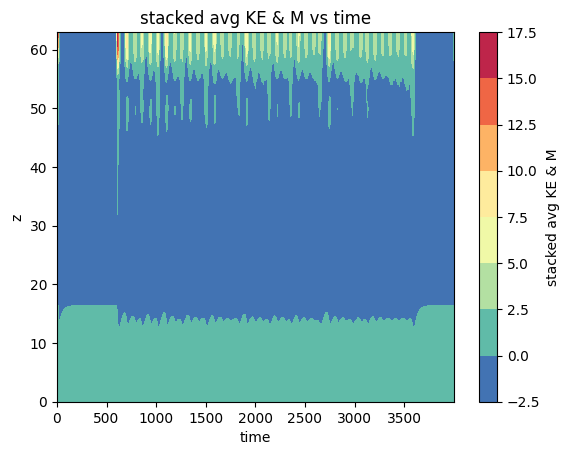

In [5]:
avg_KE_all_time = get_all_data("avg KE by xy", Nz)
avg_M_all_time = get_all_data("avg M by xy", Nz)
avg_nD_all_time = get_all_data("avg -D by xy", Nz)

avg_KE_mean_byrow = np.mean(avg_KE_all_time, axis=1, keepdims = True)
avg_M_mean_byrow = np.mean(avg_M_all_time, axis=1, keepdims = True)
avg_KE_mean = np.mean(avg_KE_all_time)
avg_M_mean = np.mean(avg_M_all_time)


avg_KE_std_byrow = np.std(avg_KE_all_time, axis=1, keepdims = True)
avg_M_std_byrow = np.std(avg_M_all_time, axis=1, keepdims = True)
avg_KE_std = np.std(avg_KE_all_time)
avg_M_std = np.std(avg_M_all_time)


nmlzd_avg_KE_row = (avg_KE_all_time-avg_KE_mean_byrow)/avg_KE_std_byrow
nmlzd_avg_M_row = (avg_M_all_time-avg_M_mean_byrow)/avg_M_std_byrow
nmlzd_avg_KE = (avg_KE_all_time-avg_KE_mean)/avg_KE_std
nmlzd_avg_M = (avg_M_all_time-avg_M_mean)/avg_M_std
stacked_KEM = np.vstack((nmlzd_avg_M , nmlzd_avg_KE))

print(np.shape(stacked_KEM))
#draw_contour(avg_KE_all_time, "avg KE")
#draw_contour(avg_M_all_time, "avg M")
#draw_contour(avg_nD_all_time, "avg -H")
draw_contour(nmlzd_avg_KE, "normalized avg KE")
draw_contour(nmlzd_avg_M, "normalized avg M")
draw_contour(stacked_KEM, "stacked avg KE & M")

(4000, 32)
(32, 4000)
(4000, 32)
(32, 4000)
(4000, 32)
(32, 4000)
(39, 2700)


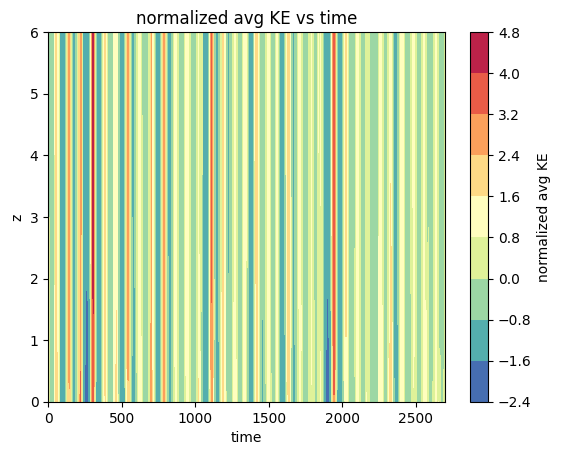

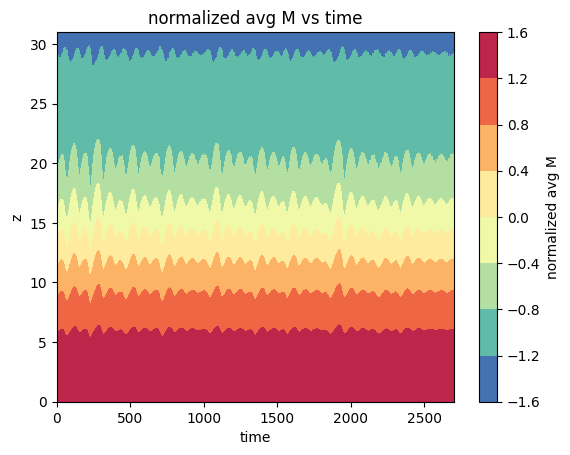

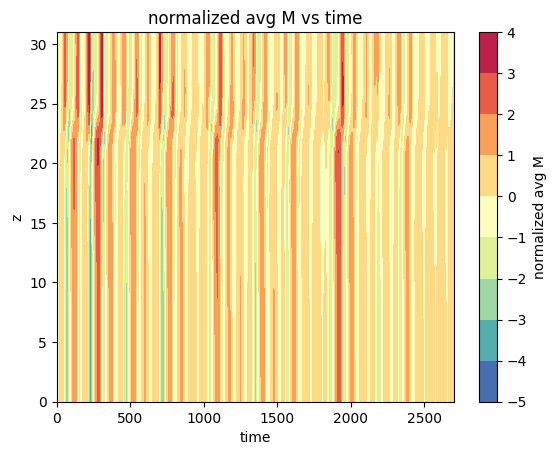

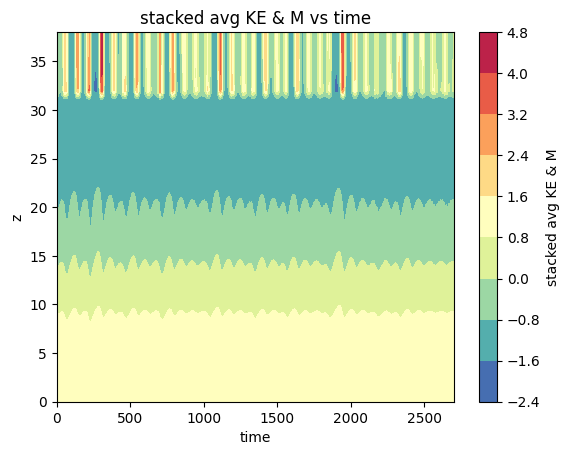

In [6]:
avg_KE_all_time = get_all_data("avg KE by xy", Nz)[25:,800:3500]
avg_M_all_time = get_all_data("avg M by xy", Nz)[:, 800:3500]
avg_nD_all_time = get_all_data("avg -D by xy", Nz)

avg_KE_mean_byrow = np.mean(avg_KE_all_time, axis=1, keepdims = True)
avg_M_mean_byrow = np.mean(avg_M_all_time, axis=1, keepdims = True)
avg_KE_mean = np.mean(avg_KE_all_time)
avg_M_mean = np.mean(avg_M_all_time)


avg_KE_std_byrow = np.std(avg_KE_all_time, axis=1, keepdims = True)
avg_M_std_byrow = np.std(avg_M_all_time, axis=1, keepdims = True)
avg_KE_std = np.std(avg_KE_all_time)
avg_M_std = np.std(avg_M_all_time)


nmlzd_avg_KE_row = (avg_KE_all_time-avg_KE_mean_byrow)/avg_KE_std_byrow
nmlzd_avg_M_row = (avg_M_all_time-avg_M_mean_byrow)/avg_M_std_byrow
nmlzd_avg_KE = (avg_KE_all_time-avg_KE_mean)/avg_KE_std
nmlzd_avg_M = (avg_M_all_time-avg_M_mean)/avg_M_std

stacked_KEM = np.vstack((nmlzd_avg_M , nmlzd_avg_KE_row))

print(np.shape(stacked_KEM))
#draw_contour(avg_KE_all_time, "avg KE")
#draw_contour(avg_M_all_time, "avg M")
#draw_contour(avg_nD_all_time, "avg -H")
draw_contour(nmlzd_avg_KE_row, "normalized avg KE")
draw_contour(nmlzd_avg_M, "normalized avg M")
draw_contour(nmlzd_avg_M_row, "normalized avg M")
draw_contour(stacked_KEM, "stacked avg KE & M")

In [7]:

def DMD(mat_A, r=None):
    """
    Perform Dynamic Mode Decomposition (DMD) on the dataset KE_all_time.

    Parameters:
    - KE_all_time: NumPy array of shape (32, 2000), where each column is a data snapshot.
    - r: Number of singular values/modes to keep. If None, use full rank.

    Returns:
    - Phi: DMD modes
    - Lambda: Eigenvalues of the DMD modes
    - b: Amplitudes of the DMD modes
    """

    # Step 1: Prepare the data matrices X and X'
    X = mat_A[:, :-1]
    X_prime = mat_A[:, 1:]

    # Step 2: Perform SVD on X
    U, Sigma, Vh = svd(X, full_matrices=False) # it is in the reduced form
    if r is not None:
        U = U[:, :r]
        Sigma = Sigma[:r]
        Vh = Vh[:r, :]

    # Step 3: Compute the pseudo-inverse of Sigma for the best-fit linear operator
    Sigma_inv = np.diag(1.0 / Sigma)

    # Compute the approximate linear operator A_tilde
    A_tilde = U.T @ X_prime @ Vh.T @ Sigma_inv

    # Step 4: Compute eigenvalues and eigenvectors of A_tilde
    Lambda, W = eig(A_tilde)

    # Compute DMD modes
    Phi = U @ W

    # Compute DMD amplitudes
    b = pinv(Phi) @ mat_A[:, 0]

    return Phi, Lambda, b

# Assuming KE_all_time is your (32, 4000) data array
# KE_all_time = np.random.rand(32, 4000)  # Example initialization, replace with your data

# Perform DMD (specify 'r' as needed, e.g., r=10 for top 10 modes)
# Phi, Lambda, b = DMD(KE_all_time, r=10)

# Now, Phi contains the DMD modes, Lambda contains the eigenvalues, and b contains the mode amplitudes

def compute_future_states(PHI, LAMBDA, B, TIMESTEPS, DT):
    """
    Compute the approximate solution at future times using DMD.

    Parameters:
    - Phi: DMD modes.
    - Lambda: Eigenvalues of the DMD modes.
    - b: Amplitudes of the DMD modes.
    - timesteps: Number of future time steps to compute.
    - dt: Time step between measurements in the original data.

    Returns:
    - X_future: The approximate future states of the system.
    """
    omega = np.log(LAMBDA) / DT
    t = np.arange(TIMESTEPS) * DT
    X_future = np.zeros((PHI.shape[0], TIMESTEPS), dtype=np.complex_)

    for i in range(TIMESTEPS):
        X_future[:, i] = np.dot(PHI, B * np.exp(omega * t[i]))
    
    return X_future.real

# Assuming KE_all_time is your data and you've already computed Phi, Lambda, b
# For example purposes, let's set some parameters
# Number of future time steps to predict
# Time step between snapshots in your original data

# Compute future states
# X_future = compute_future_states(Phi, Lambda, b, timesteps, dt)

# Note: This code assumes a consistent time step 'dt' between your original data snapshots.
# 'X_future' will contain the real part of the future states of the system.
# Adjust 'timesteps' and 'dt' as needed for your specific application.


In [18]:
def DMD2(mat_A, r=None):
    """
    Perform Dynamic Mode Decomposition (DMD) on the dataset KE_all_time.

    Parameters:
    - KE_all_time: NumPy array of shape (32, 2000), where each column is a data snapshot.
    - r: Number of singular values/modes to keep. If None, use full rank.

    Returns:
    - Phi: DMD modes
    - Lambda: Eigenvalues of the DMD modes
    - b: Amplitudes of the DMD modes
    """

    # Step 1: Prepare the data matrices X and X'
    X = mat_A[:, :-1]
    X_prime = mat_A[:, 1:]

    # Step 2: Perform SVD on X
    U, Sigma, Vh = svd(X, full_matrices=False) # it is in the reduced form
    if r is not None:
        U = U[:, :r]
        Sigma = Sigma[:r]
        Vh = Vh[:r, :]

    # Step 3: Compute the pseudo-inverse of Sigma for the best-fit linear operator
    Sigma_inv = np.diag(1.0 / Sigma)

    # Compute the approximate linear operator A_tilde
    A_tilde = U.T @ X_prime @ Vh.T @ Sigma_inv

    # Step 4: Compute eigenvalues and eigenvectors of A_tilde
    Lambda, W = eig(A_tilde)

    # Compute DMD modes
    Phi = U @ W

    # Compute DMD amplitudes
    b = pinv(Phi) @ mat_A[:, 0]

    return Phi, Lambda, b

In [8]:
def local_look(begin_time, end_time, data_all, name):
    datasample = data_all[:, begin_time:end_time]
    phi, Lam, b = DMD(datasample)
    dt = 1
    timesteps = 500
    future_data = compute_future_states(phi, Lam, b, timesteps, 1)
    n_rows, n_columns = datasample.shape
    x_ax = np.linspace(begin_time, end_time, n_columns)
    y_ax = np.linspace(0, n_rows-1, n_rows)
    X_ax, Y_ax = np.meshgrid(x_ax, y_ax)
    plt.figure(figsize=(16, 4))
    plt.subplot(1,2,1)
    plt.contourf(X_ax, Y_ax, datasample, cmap='Spectral_r')
    plt.colorbar(label=f'avg_{name}')
    plt.xlabel('time')
    plt.ylabel('z')
    plt.title(f'avg {name} by z vs time')
    # plt.savefig(f'.png', dpi=200,bbox_inches='tight')
    plt.subplot(1,2,2)
    plt.contourf(future_data, cmap='Spectral_r')
    plt.colorbar(label=f'avg_{name}')
    plt.xlabel('time')
    plt.ylabel('z')
    plt.title(f'avg {name} by z vs time')
    # plt.savefig(f'.png', dpi=200,bbox_inches='tight')
    plt.show()
    plt.clf()

In [9]:
#for beginning_time in range(600, 3000, 100):
#    local_look(beginning_time, 3500, avg_KE_all_time, 'KE')
# 1800 and 2800 are best two

In [10]:
#for beginning_time in range(600, 3000, 100):
#    local_look(beginning_time, 3500, avg_M_all_time, 'M')

In [24]:
name = "stacked"
datasample = np.array([[1,2,3,4],[2,3,5,6],[4,6,8,10]])
print(datasample)
phi, Lam, b = DMD(datasample)
dt = 1
timesteps = 4
future_data = compute_future_states(phi, Lam, b, timesteps, 1)
n_rows, n_columns = datasample.shape

phi2, Lam2, b2 = DMD2(datasample)
future_data2 = compute_future_states(phi2, Lam2, b2, timesteps, 1)
print(future_data)
print(future_data2-future_data)

[[ 1  2  3  4]
 [ 2  3  5  6]
 [ 4  6  8 10]]
[[ 1.  2.  3.  4.]
 [ 2.  3.  5.  6.]
 [ 4.  6.  8. 10.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:

plt.contourf(future_data,  cmap='Spectral_r')
plt.colorbar(label=f'avg_{name}')
plt.xlabel('time')
plt.ylabel('z')
plt.title(f'avg {name} by z vs time')
# plt.savefig(f'.png', dpi=200,bbox_inches='tight')
plt.show()
plt.clf()

plt.contourf(future_data2, , cmap='Spectral_r')
plt.colorbar(label=f'avg_{name}')
plt.xlabel('time')
plt.ylabel('z')
plt.title(f'Phi = U W')
# plt.savefig(f'.png', dpi=200,bbox_inches='tight')
plt.show()

plt.contourf(np.abs(diff/future_data), cmap='Spectral_r')
plt.colorbar(label=f'avg_{name}')
plt.xlabel('time')
plt.ylabel('z')
plt.title(f'percentage difference')
# plt.savefig(f'.png', dpi=200,bbox_inches='tight')
plt.show()